In [1]:
import h5py, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, sys, neurokit2 as nk

sys.path.append('../preprocess')
from rebuild import*


BEG_TEST = '../data/TestData/'

dfAgeSex = pd.read_csv(BEG_TEST + 'attributes.csv')
with h5py.File(BEG_TEST + 'ecg_tracings.hdf5') as f:
    M = np.array(f['tracings'])
dfLabels = pd.read_csv(BEG_TEST + 'annotations' + os.sep + 'gold_standard.csv')

In [2]:
dfLabels

,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
822,0,0,0,0,0,0
823,0,0,0,0,0,0
824,0,0,0,0,0,0
825,0,0,0,0,0,0


{'ECG_P_Peaks': [606, 954, 1303, 1665, 2043, 2413, 2788, 3152, 3425],
 'ECG_P_Onsets': [589, 948, 1289, 1648, 2024, 2404, 2780, 3132, 3418],
 'ECG_P_Offsets': [610, 960, 1313, 1674, 2066, 2421, 2796, 3159, 3433],
 'ECG_Q_Peaks': [655, 1005, 1353, 1714, 2091, 2461, 2837, 3200, 3499],
 'ECG_R_Onsets': [647, 997, 1345, 1706, 2084, 2453, 2829, 3192, 3506],
 'ECG_R_Offsets': [679, 1029, 1378, 1750, 2116, 2490, 2861, 3225, 3517],
 'ECG_S_Peaks': [692, 1043, 1387, 1749, 2131, 2496, 2867, 3235, 3514],
 'ECG_T_Peaks': [772, 1122, 1472, 1833, 2211, 2580, 2956, 3318, 3535],
 'ECG_T_Onsets': [745, 1090, 1441, 1807, 2171, 2553, 2921, 3285, 3533],
 'ECG_T_Offsets': [798, 1150, 1499, 1860, 2235, 2606, 2982, 3342, 3537]}

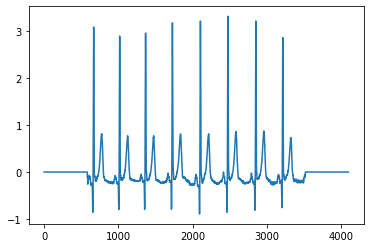

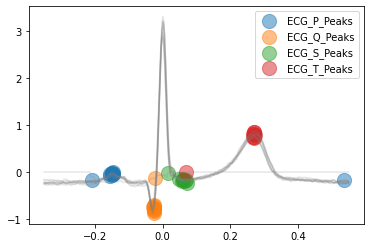

In [3]:
pessoa = 0
ecg = M[pessoa, :, 0]
plt.plot(ecg)

try:
    d = nk.ecg_delineate(ecg, sampling_rate=SAMPLE_RATE, show=True)[1]
except:
    raise Exception('Neurokit não conseguiu delinear esse ECG')
d

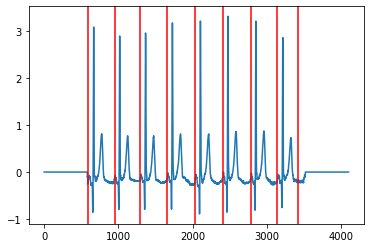

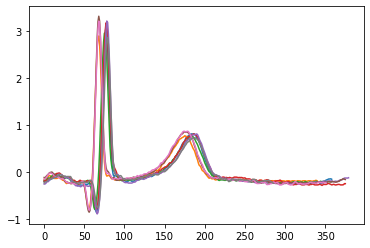

In [4]:
lims = (820, 1900)
plt.plot(ecg)
offs = d['ECG_P_Onsets']
for x in offs:
    plt.axvline(x, c='r')
plt.show()
for i in range(len(offs) - 1):
    plt.plot(ecg[offs[i]:offs[i+1]])
plt.show()

In [7]:
sys.path.append('..')

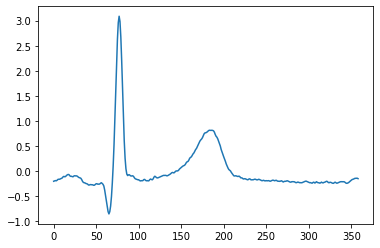

359.0


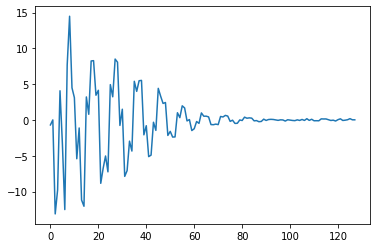

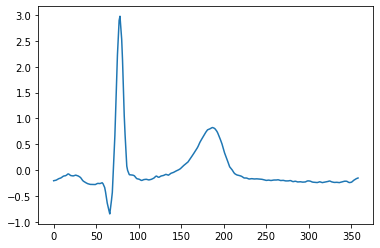

In [8]:
from preprocess2.common import GetCoeff
w = ecg[offs[0]:offs[1]]
plt.plot(w)
plt.show()
c = GetCoeff(w)
lenOrg = c[0]
print(lenOrg)
fourier = c[1:]
plt.plot(fourier)
plt.show()
rebuilt = RebuildWave(c)
plt.plot(rebuilt)
plt.show()